In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
url = 'https://www.ismworld.org/supply-management-news-and-reports/reports/ism-report-on-business/pmi/january/'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [ ]:
print(soup)

In [20]:
from collections import OrderedDict
import pandas as pd

# List of industries reported to increase and decrease in business activity for January
INCREASE_INDUSTRIES_JANUARY = [
    "Agriculture, Forestry, Fishing & Hunting",
    "Health Care & Social Assistance",
    "Utilities",
    "Management of Companies & Support Services",
    "Public Administration",
    "Professional, Scientific & Technical Services",
    "Wholesale Trade",
    "Finance & Insurance",
    "Educational Services",
    "Transportation & Warehousing"
]

DECREASE_INDUSTRIES_JANUARY = [
    "Retail Trade",
    "Real Estate, Rental & Leasing",
    "Information",
    "Mining",
    "Arts, Entertainment & Recreation"
]


def process_paragraph(para_text):
    """
    Process the provided paragraph containing information about industries reporting growth and decrease.
    Returns a dictionary where keys are industries and values indicate growth or decrease.
    """
    # Split the paragraph into sentences
    sentences = para_text.split(".")
    growth_sentence = sentences[0]
    decrease_sentence = sentences[1]

    list_industries_growth = get_list_of_industries_from_sentence(growth_sentence)
    list_industries_decrease = get_list_of_industries_from_sentence(decrease_sentence)

    # Find neutral industries
    list_industries_neutral = [industry for industry in INCREASE_INDUSTRIES_JANUARY + DECREASE_INDUSTRIES_JANUARY
                               if industry not in list_industries_growth and industry not in list_industries_decrease]

    industries_dict = create_dict_of_industries(list_industries_growth, list_industries_neutral, list_industries_decrease)

    return industries_dict


def get_list_of_industries_from_sentence(sentence):
    """
    Creates a list of industries based on the given sentence.
    """
    list_industries = []
    for industry in INCREASE_INDUSTRIES_JANUARY + DECREASE_INDUSTRIES_JANUARY:
        if industry in sentence:
            list_industries.append(industry)
    return list_industries


def create_dict_of_industries(list_growth, list_neutral, list_decrease):
    """
    Creates a dictionary of key-value pairs where the key is the industry,
    and the value indicates growth (positive), neutrality (0), or decrease (negative).
    """
    industries_dict = OrderedDict()

    growth_index = len(list_growth)
    for growth_industry in list_growth:
        industries_dict[growth_industry] = growth_index
        growth_index -= 1

    for neutral_industry in list_neutral:
        industries_dict[neutral_industry] = 0

    decrease_index = len(list_decrease)
    for decrease_industry in list_decrease:
        industries_dict[decrease_industry] = -decrease_index
        decrease_index -= 1

    return industries_dict


# Example paragraph
paragraph = ("The 10 industries reporting an increase in business activity for the month of January — listed in order — are: "
             "Agriculture, Forestry, Fishing & Hunting; Health Care & Social Assistance; Utilities; "
             "Management of Companies & Support Services; Public Administration; Professional, Scientific & Technical Services; "
             "Wholesale Trade; Finance & Insurance; Educational Services; and Transportation & Warehousing. "
             "The five industries reporting a decrease in business activity for the month of January are: "
             "Retail Trade; Real Estate, Rental & Leasing; Information; Mining; and Arts, Entertainment & Recreation.")



def create_dataframe(paragraph):
    # Process the paragraph
    industries_dict = process_paragraph(paragraph)

    # Create a DataFrame from the dictionary
    df = pd.DataFrame(industries_dict.items(), columns=['Industry', 'Label'])

    # Add State column based on Label
    df['State'] = df['Label'].apply(lambda x: 'Growth' if x > 0 else ('Neutral' if x == 0 else 'Decrease'))

    return df


# Create DataFrame
df = create_dataframe(paragraph)

# Print DataFrame
print(df)


                                         Industry  Label     State
0        Agriculture, Forestry, Fishing & Hunting     10    Growth
1                 Health Care & Social Assistance      9    Growth
2                                       Utilities      8    Growth
3      Management of Companies & Support Services      7    Growth
4                           Public Administration      6    Growth
5   Professional, Scientific & Technical Services      5    Growth
6                                 Wholesale Trade      4    Growth
7                             Finance & Insurance      3    Growth
8                            Educational Services      2    Growth
9                    Transportation & Warehousing      1    Growth
10                                   Retail Trade     -5  Decrease
11                  Real Estate, Rental & Leasing     -4  Decrease
12                                    Information     -3  Decrease
13                                         Mining     -2  Decr

In [6]:
from collections import OrderedDict
import pandas as pd

# List of industries reported to increase and decrease in business activity for January
INCREASE_INDUSTRIES_JANUARY = [
    "Agriculture, Forestry, Fishing & Hunting",
    "Health Care & Social Assistance",
    "Utilities",
    "Management of Companies & Support Services",
    "Public Administration",
    "Professional, Scientific & Technical Services",
    "Wholesale Trade",
    "Finance & Insurance",
    "Educational Services",
    "Transportation & Warehousing"
]

DECREASE_INDUSTRIES_JANUARY = [
    "Retail Trade",
    "Real Estate, Rental & Leasing",
    "Information",
    "Mining",
    "Arts, Entertainment & Recreation"
]


def process_paragraph(para_text):
    """
    Process the provided paragraph containing information about industries reporting growth and decrease.
    Returns a dictionary where keys are industries and values indicate growth or decrease.
    """
    # Split the paragraph into sentences
    sentences = para_text.split(".")
    growth_sentence = sentences[0]
    decrease_sentence = sentences[1]

    list_industries_growth = get_list_of_industries_from_sentence(growth_sentence)
    list_industries_decrease = get_list_of_industries_from_sentence(decrease_sentence)

    # Find neutral industries
    list_industries_neutral = [industry for industry in INCREASE_INDUSTRIES_JANUARY + DECREASE_INDUSTRIES_JANUARY
                               if industry not in list_industries_growth and industry not in list_industries_decrease]

    industries_dict = create_dict_of_industries(list_industries_growth, list_industries_neutral, list_industries_decrease)

    return industries_dict


def get_list_of_industries_from_sentence(sentence):
    """
    Creates a list of industries based on the given sentence.
    """
    list_industries = []
    for industry in INCREASE_INDUSTRIES_JANUARY + DECREASE_INDUSTRIES_JANUARY:
        if industry in sentence:
            list_industries.append(industry)
    return list_industries


def create_dict_of_industries(list_growth, list_neutral, list_decrease):
    """
    Creates a dictionary of key-value pairs where the key is the industry,
    and the value indicates growth (positive), neutrality (0), or decrease (negative).
    """
    industries_dict = OrderedDict()

    growth_index = len(list_growth)
    for growth_industry in list_growth:
        industries_dict[growth_industry] = f"Growth {growth_index}"
        growth_index -= 1

    for neutral_industry in list_neutral:
        industries_dict[neutral_industry] = "Neutral"

    decrease_index = len(list_decrease)
    for decrease_industry in list_decrease:
        industries_dict[decrease_industry] = f"Decrease {decrease_index}"
        decrease_index -= 1

    return industries_dict


# Example paragraph
paragraph = ("The 10 industries reporting an increase in business activity for the month of January — listed in order — are: "
             "Agriculture, Forestry, Fishing & Hunting; Health Care & Social Assistance; Utilities; "
             "Management of Companies & Support Services; Public Administration; Professional, Scientific & Technical Services; "
             "Wholesale Trade; Finance & Insurance; Educational Services; and Transportation & Warehousing. "
             "The five industries reporting a decrease in business activity for the month of January are: "
             "Retail Trade; Real Estate, Rental & Leasing; Information; Mining; and Arts, Entertainment & Recreation.")


def create_dataframe(paragraph):
    # Process the paragraph
    industries_dict = process_paragraph(paragraph)

    # Create a list of tuples containing industry and state
    industry_states = [(industry, state, label) for industry, label in industries_dict.items()
                       for state in ['Growth', 'Decrease', 'Neutral'] if state in label]

    # Create a DataFrame from the list of tuples
    df = pd.DataFrame(industry_states, columns=['Industry', 'State', 'Label'])

    return df


# Create DataFrame
df = create_dataframe(paragraph)

# Print DataFrame
print(df)


                                         Industry     State       Label
0        Agriculture, Forestry, Fishing & Hunting    Growth   Growth 10
1                 Health Care & Social Assistance    Growth    Growth 9
2                                       Utilities    Growth    Growth 8
3      Management of Companies & Support Services    Growth    Growth 7
4                           Public Administration    Growth    Growth 6
5   Professional, Scientific & Technical Services    Growth    Growth 5
6                                 Wholesale Trade    Growth    Growth 4
7                             Finance & Insurance    Growth    Growth 3
8                            Educational Services    Growth    Growth 2
9                    Transportation & Warehousing    Growth    Growth 1
10                                   Retail Trade  Decrease  Decrease 5
11                  Real Estate, Rental & Leasing  Decrease  Decrease 4
12                                    Information  Decrease  Dec

In [18]:
from collections import OrderedDict
import pandas as pd

# List of industries reported to increase and decrease in business activity for January
INCREASE_INDUSTRIES_JANUARY = [
    "Agriculture, Forestry, Fishing & Hunting",
    "Health Care & Social Assistance",
    "Utilities",
    "Management of Companies & Support Services",
    "Public Administration",
    "Professional, Scientific & Technical Services",
    "Wholesale Trade",
    "Finance & Insurance",
    "Educational Services",
    "Transportation & Warehousing"
]

DECREASE_INDUSTRIES_JANUARY = [
    "Retail Trade",
    "Real Estate, Rental & Leasing",
    "Information",
    "Mining",
    "Arts, Entertainment & Recreation"
]


def process_paragraph(para_text):
    """
    Process the provided paragraph containing information about industries reporting growth and decrease.
    Returns a dictionary where keys are industries and values indicate growth or decrease.
    """
    # Split the paragraph into sentences
    sentences = para_text.split(".")
    growth_sentence = sentences[0]
    decrease_sentence = sentences[1]

    list_industries_growth = get_list_of_industries_from_sentence(growth_sentence)
    list_industries_decrease = get_list_of_industries_from_sentence(decrease_sentence)

    # Find neutral industries
    list_industries_neutral = [industry for industry in INCREASE_INDUSTRIES_JANUARY + DECREASE_INDUSTRIES_JANUARY
                               if industry not in list_industries_growth and industry not in list_industries_decrease]

    industries_dict = create_dict_of_industries(list_industries_growth, list_industries_neutral, list_industries_decrease)

    return industries_dict


def get_list_of_industries_from_sentence(sentence):
    """
    Creates a list of industries based on the given sentence.
    """
    list_industries = []
    for industry in INCREASE_INDUSTRIES_JANUARY + DECREASE_INDUSTRIES_JANUARY:
        if industry in sentence:
            list_industries.append(industry)
    return list_industries


def create_dict_of_industries(list_growth, list_neutral, list_decrease):
    """
    Creates a dictionary of key-value pairs where the key is the industry,
    and the value indicates growth (positive), neutrality (0), or decrease (negative).
    """
    industries_dict = OrderedDict()

    growth_index = len(list_growth)
    for growth_industry in list_growth:
        industries_dict[growth_industry] = growth_index
        growth_index -= 1

    for neutral_industry in list_neutral:
        industries_dict[neutral_industry] = 0

    decrease_index = -1
    for decrease_industry in list_decrease:
        industries_dict[decrease_industry] = decrease_index
        decrease_index -= 1

    return industries_dict


# Example paragraph
paragraph = ("The 10 industries reporting an increase in business activity for the month of January — listed in order — are: "
             "Agriculture, Forestry, Fishing & Hunting; Health Care & Social Assistance; Utilities; "
             "Management of Companies & Support Services; Public Administration; Professional, Scientific & Technical Services; "
             "Wholesale Trade; Finance & Insurance; Educational Services; and Transportation & Warehousing. "
             "The five industries reporting a decrease in business activity for the month of January are: "
             "Retail Trade; Real Estate, Rental & Leasing; Information; Mining; and Arts, Entertainment & Recreation.")


def create_dataframe(paragraph):
    # Process the paragraph
    industries_dict = process_paragraph(paragraph)

    # Create a DataFrame from the dictionary
    df = pd.DataFrame(industries_dict.items(), columns=['Industry', 'Label'])

    # Add State column based on Label
    df['State'] = df['Label'].apply(lambda x: 'Growth' if x > 0 else ('Neutral' if x == 0 else 'Decrease'))

    return df


# Create DataFrame
df = create_dataframe(paragraph)

# Print DataFrame
print(df)


                                         Industry  Label     State
0        Agriculture, Forestry, Fishing & Hunting     10    Growth
1                 Health Care & Social Assistance      9    Growth
2                                       Utilities      8    Growth
3      Management of Companies & Support Services      7    Growth
4                           Public Administration      6    Growth
5   Professional, Scientific & Technical Services      5    Growth
6                                 Wholesale Trade      4    Growth
7                             Finance & Insurance      3    Growth
8                            Educational Services      2    Growth
9                    Transportation & Warehousing      1    Growth
10                                   Retail Trade     -1  Decrease
11                  Real Estate, Rental & Leasing     -2  Decrease
12                                    Information     -3  Decrease
13                                         Mining     -4  Decr

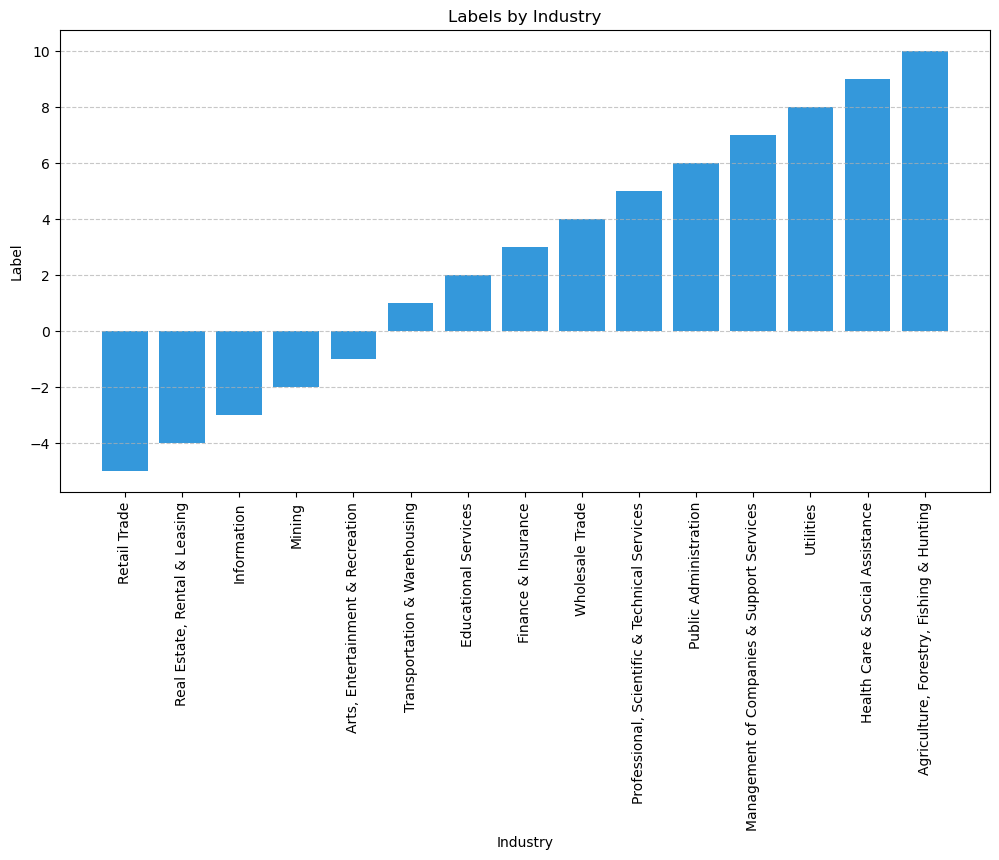

In [8]:
import matplotlib.pyplot as plt

# Define a single color for all bars
custom_color = '#3498db'  # This is a blue color

# Sort the DataFrame by label
sorted_df = df.sort_values(by='Label')

# Create a bar plot with the specified color
plt.figure(figsize=(12, 6))
plt.bar(sorted_df['Industry'], sorted_df['Label'], color=custom_color)
plt.xlabel('Industry')
plt.ylabel('Label')
plt.title('Labels by Industry')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
